


# MACHINE LEARNING E DEEP LEARNING

<hr>

## Objectives

* We want to Identify **target bias** and discuss how you can resolve them
  - Data Bias
  - Algorithm Bias
* Design a **Model Card** based on your findings

##  Overview:
The overall aim of this Lesson is to identify bias for **target groups** (as defined in the  <a href="https://digital-strategy.ec.europa.eu/en/library/assessment-list-trustworthy-artificial-intelligence-altai-self-assessment"> EC ALTAI </a>). This is applied to both the data and the algorithms. Students must identify and discuss any biases that might effect users of the model. Building trustworthy models involves deeper dives and discussion on not only how good your model is but where it's weaknesses lie, and being honest and upfront when presenting the model metrics.
<br>
<br>

To that end, this chalenge will ask students to investigate data and model bias from a target group viewpoint, to discuss potential and metric-driven issues that may arise from this work.
<br>
<br>
The following section gives an overview of the tasks and the time allocation that students should aim to follow.
<br>
<br>
Please note this was designed to run in <a href="https://colab.research.google.com/">Google Colab</a>, you may need to install additional modules and versions if running locally.
<br>
<br>
<hr>


# References
<br>

[1]<a href="https://digital-strategy.ec.europa.eu/en/library/assessment-list-trustworthy-artificial-intelligence-altai-self-assessment">Assessment List for Trustworthy Artificial Intelligence (ALTAI) for self-assessment</a>

[2]M. Mitchell, S. Wu, A. Zaldivar, P. Barnes, L. Vasserman, B. Hutchinson, E. Spitzer, I. D. Raji, and T. Gebru.<a href="https://dl.acm.org/doi/10.1145/3287560.3287596"> Model cards for model reporting. In Proceedings of the Conference on Fairness, Accountability, and Transparency.</a>  FAT* ’19, page 220–229, New York, NY, USA, 2019. Association for Computing Machinery.

[3] Didactical Material from Master in Human Centered Artificial Intelligence (HCAIM), higher education programme funded by the European Union under the Connecting Europe Facility (CEF).


# Introduction, Imports and Read in Data




In [6]:
#@title Imports and Read in Data

#Importing revelant libraries and installing facets for visualisation
import pandas as pd  #gestione dati tabellari
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*
import tensorflow as tf
from tensorflow import keras
import numpy as np


# sklearn encoding, data preparation and evaluation tools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Keras (2.X on - I used 2.7 but the below should work for any version.)
from keras.layers import Dense, SpatialDropout3D
from keras.models import Sequential

seed = 1
# fix random seed for reproducibility
np.random.seed(seed)

# Some matplotlib figure sizes
plt.rcParams["figure.figsize"] = (12,8)


# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator


# Opening the file from github
filename = "/content/adults.csv"

data = pd.read_csv(filename)


data.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


from matplotlib import pyplot as plt
_df_0['39'].plot(kind='hist', bins=20, title='39')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[' 77516'].plot(kind='hist', bins=20, title=' 77516')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[' 13'].plot(kind='hist', bins=20, title=' 13')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[' 2174'].plot(kind='hist', bins=20, title=' 2174')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='39', y=' 77516', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=' 77516', y=' 13', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=' 13', y=' 2174', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=' 2174', y=' 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['39'].plot(kind='line', figsize=(8, 4), title='39')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[' 77516'].plot(kind='line', figsize=(8, 4), title=' 77516')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[' 13'].plot(kind='line', figsize=(8, 4), title=' 13')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[' 2174'].plot(kind='line', figsize=(8, 4), title=' 2174')
plt.gca().spines[['top', 'right']].set_visible(False)

#  Data Visualisation and basic data pre-processing

 we are using Facets (https://pypi.org/project/facets-overview/) to visualise and investigate possible Biases in the dataset.

<br>

Below two code cells help in visualising the data specially if you have not used Facets before:


*   Visualise the data, identify, discuss and record any concerns you have with the data (including missing data, skewness, anomalies, outliers etc).
*   Using Facets deep dive, compare attributes, such as age and education, using "Binning X" and "Binning Y", and then show target groups using the "Color By" drop down. This may help highlight bias in bins.
<br><br>
### our goal for this task is to identify any biases in the data. That includes issues (missing data etc) and target group bias. You DO NOT HAVE TO address it, just identify it and record it for inclusion in Task 6.

For example - **What noteworthy observations can you make about the gender distributions for each maritial-status?**

In [9]:
pip install tensorflow-data-validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

In [12]:
#@title Visualize the Data in Facets
import numpy  #useremo funzionalità di numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)
#paradigma a oggetti
# Create instance of FSG
fsg = FeatureStatisticsGenerator()

#Select dataframe
dataframes = [
    {'table': data, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)

#Serialise
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")

#Select template
HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""

#Query and display
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [13]:
#@title Visualize the Data - A deeper dive
SAMPLE_SIZE = 500 #@param

dive = data.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""

html = HTML_TEMPLATE.format(jsonstr=dive)
display(HTML(html))


## Missing Data and Data Encoding
You may need to modify this code slightly:


*   First, there are missing values, however, they are represented with a "?", thus they need to be replaced with NaN.
*   Second, some of the attributes are categorical and need to be encoded.

 **Note: it might be useful here to print the data before and after encoding and normalization - so you know what each categorical value was encoded as for later tasks**.

In [14]:
# Used to label encode categorical values
labelencoder = LabelEncoder()


#
# print head prior to encoding
#

print(data.describe())

print("\n\n Missing values (?)")
print((data == '?').sum())

# Converting missing data to NaN
data.replace('?', np.nan, inplace=True)

# here we are dropping the NaN values, this is not ideal, and you will be asked questions on this later
data.dropna(inplace=True)

print("\n\n Missing values (?) after del")
print((data == '?').sum())


# This code identifies columns that need label encoding, and are then formatted if they do
print("\n\nColumn Names & formatting:\n")
for col in data.columns.values.tolist():
    if data[col].dtype == "object" or data[col].dtype == "bool":
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "Formatting to LabelEncoding")
        data[col] = labelencoder.fit_transform(data[col])
    else:
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "No formatting required.")

#WE WORKED IN PANDAS, MANAGING THE DATA LIKE A TABLE WITH ALSO NOT NUMERIC ELEMENT
#NOW, WITH THIS CONVERSION WE WORK IN NUMPY - IN NUMERIC DOMAIN
# Convert to array
#CREATING A MATRIX STARTING FROM THE TABLE
array = data.values

#we start from pandas table and arrive to numpy matrix (mandatory numeric)


# get seperated input and classifies, using a deep copy of a list, this is for ML models
X = array[:,0:14]
Y = array[:,14]


# Optional: to speed up deep learning model training - try this after algorithm development if the results are poor.
#----------------------------------------------------------
# Normalizing the input values (excluding the class value)
scaler = preprocessing.Normalizer().fit(X)
X = scaler.transform(X)

#
# print head post encoding
#
print("original")
data.describe()


                 39         77516            13          2174             0  \
count  32560.000000  3.256000e+04  32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05     10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05      2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 40  
count  32560.000000  
mean      40.437469  
std       12.347618  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


 Missing values (?)
39                0
 State-gov        0
 77516            0
 Bachelo

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [15]:
print("normalizzata")
DX=pd.DataFrame(X)
DX.describe()

normalizzata


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.000308,0.000031,0.998796,0.000082,0.000080,0.000020,0.000052,0.000011,0.000029,0.000005,0.007050,0.000691,0.000321,0.000293
std,0.000311,0.000032,0.016682,0.000085,0.000076,0.000024,0.000064,0.000020,0.000027,0.000007,0.045375,0.004263,0.000325,0.000276
min,0.000017,0.000000,0.246804,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000
25%,0.000135,0.000014,1.000000,0.000038,0.000039,0.000008,0.000016,0.000000,0.000014,0.000000,0.000000,0.000000,0.000153,0.000148
50%,0.000213,0.000022,1.000000,0.000059,0.000056,0.000014,0.000035,0.000005,0.000021,0.000004,0.000000,0.000000,0.000225,0.000211
75%,0.000349,0.000034,1.000000,0.000090,0.000087,0.000024,0.000063,0.000016,0.000032,0.000007,0.000000,0.000000,0.000348,0.000322
max,0.003980,0.000361,1.000000,0.001221,0.001008,0.000326,0.000744,0.000258,0.000212,0.000073,0.969065,0.094350,0.004177,0.003175


# Data Preparation



## Stratification and Splitting data

 we are using stratification in our data split see: https://scikit-learn.org/stable/modules/cross_validation.html#stratification

In [16]:
# We are using stratification here, this startifies based on class values.
seed = 1
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:

print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 21815
Testing dataset length: 10745

Percentage of 1's in Training data:  24.08 %
Percentage of 1's in Test data    :  24.09 %


In [17]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

# Algorithm Development


 we are using two algorithms for this lesson, a deep learning neural network and a decision tree.

<br>

For each algorithm a separate cell is created.


*   Run both algorithms, and select the best algorithm, based on performance and in particular fairness. You will proceed with one algorithm, however, if you have time and your team is comfortable with the code:
  -  Tune the algorithms (deep learning layers, hyperparameters etc, decision tree pruning parameters)
  - Run both algorithms for the following tasks and then determine which is the most suitable.




In [18]:
#@title Decision Tree algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# You can modify the maximum depth of the tree, you can find more detauils on this and pruning options at:
# Link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
modeldt = DecisionTreeClassifier(max_depth=3)

modeldt.fit(X_train, Y_train)

results = modeldt.score(X_test, Y_test)

print(results)

# Generate predictions from text data
dt_y_pred = modeldt.predict(X_test)

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dt_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

# print the decision tree rules:
print("\n\nDecision Tree Rules:")
print("*"*40)
text_representation = tree.export_text(modeldt)
print(text_representation)


with open("newModelData.log", "w") as newfile:
  newfile.write(text_representation )

0.8052117263843648
Predicted     0    1    All
Actual                     
0          7911  246   8157
1          1847  741   2588
All        9758  987  10745


Decision Tree Rules:
****************************************
|--- feature_7 <= 0.00
|   |--- feature_2 <= 1.00
|   |   |--- feature_2 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.00
|   |   |   |--- class: 1
|   |--- feature_2 >  1.00
|   |   |--- feature_3 <= 0.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.00
|   |   |   |--- class: 0
|--- feature_7 >  0.00
|   |--- feature_10 <= 0.03
|   |   |--- feature_11 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_11 >  0.01
|   |   |   |--- class: 0
|   |--- feature_10 >  0.03
|   |   |--- feature_13 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_13 >  0.00
|   |   |   |--- class: 0



Graphycal output of the tree model

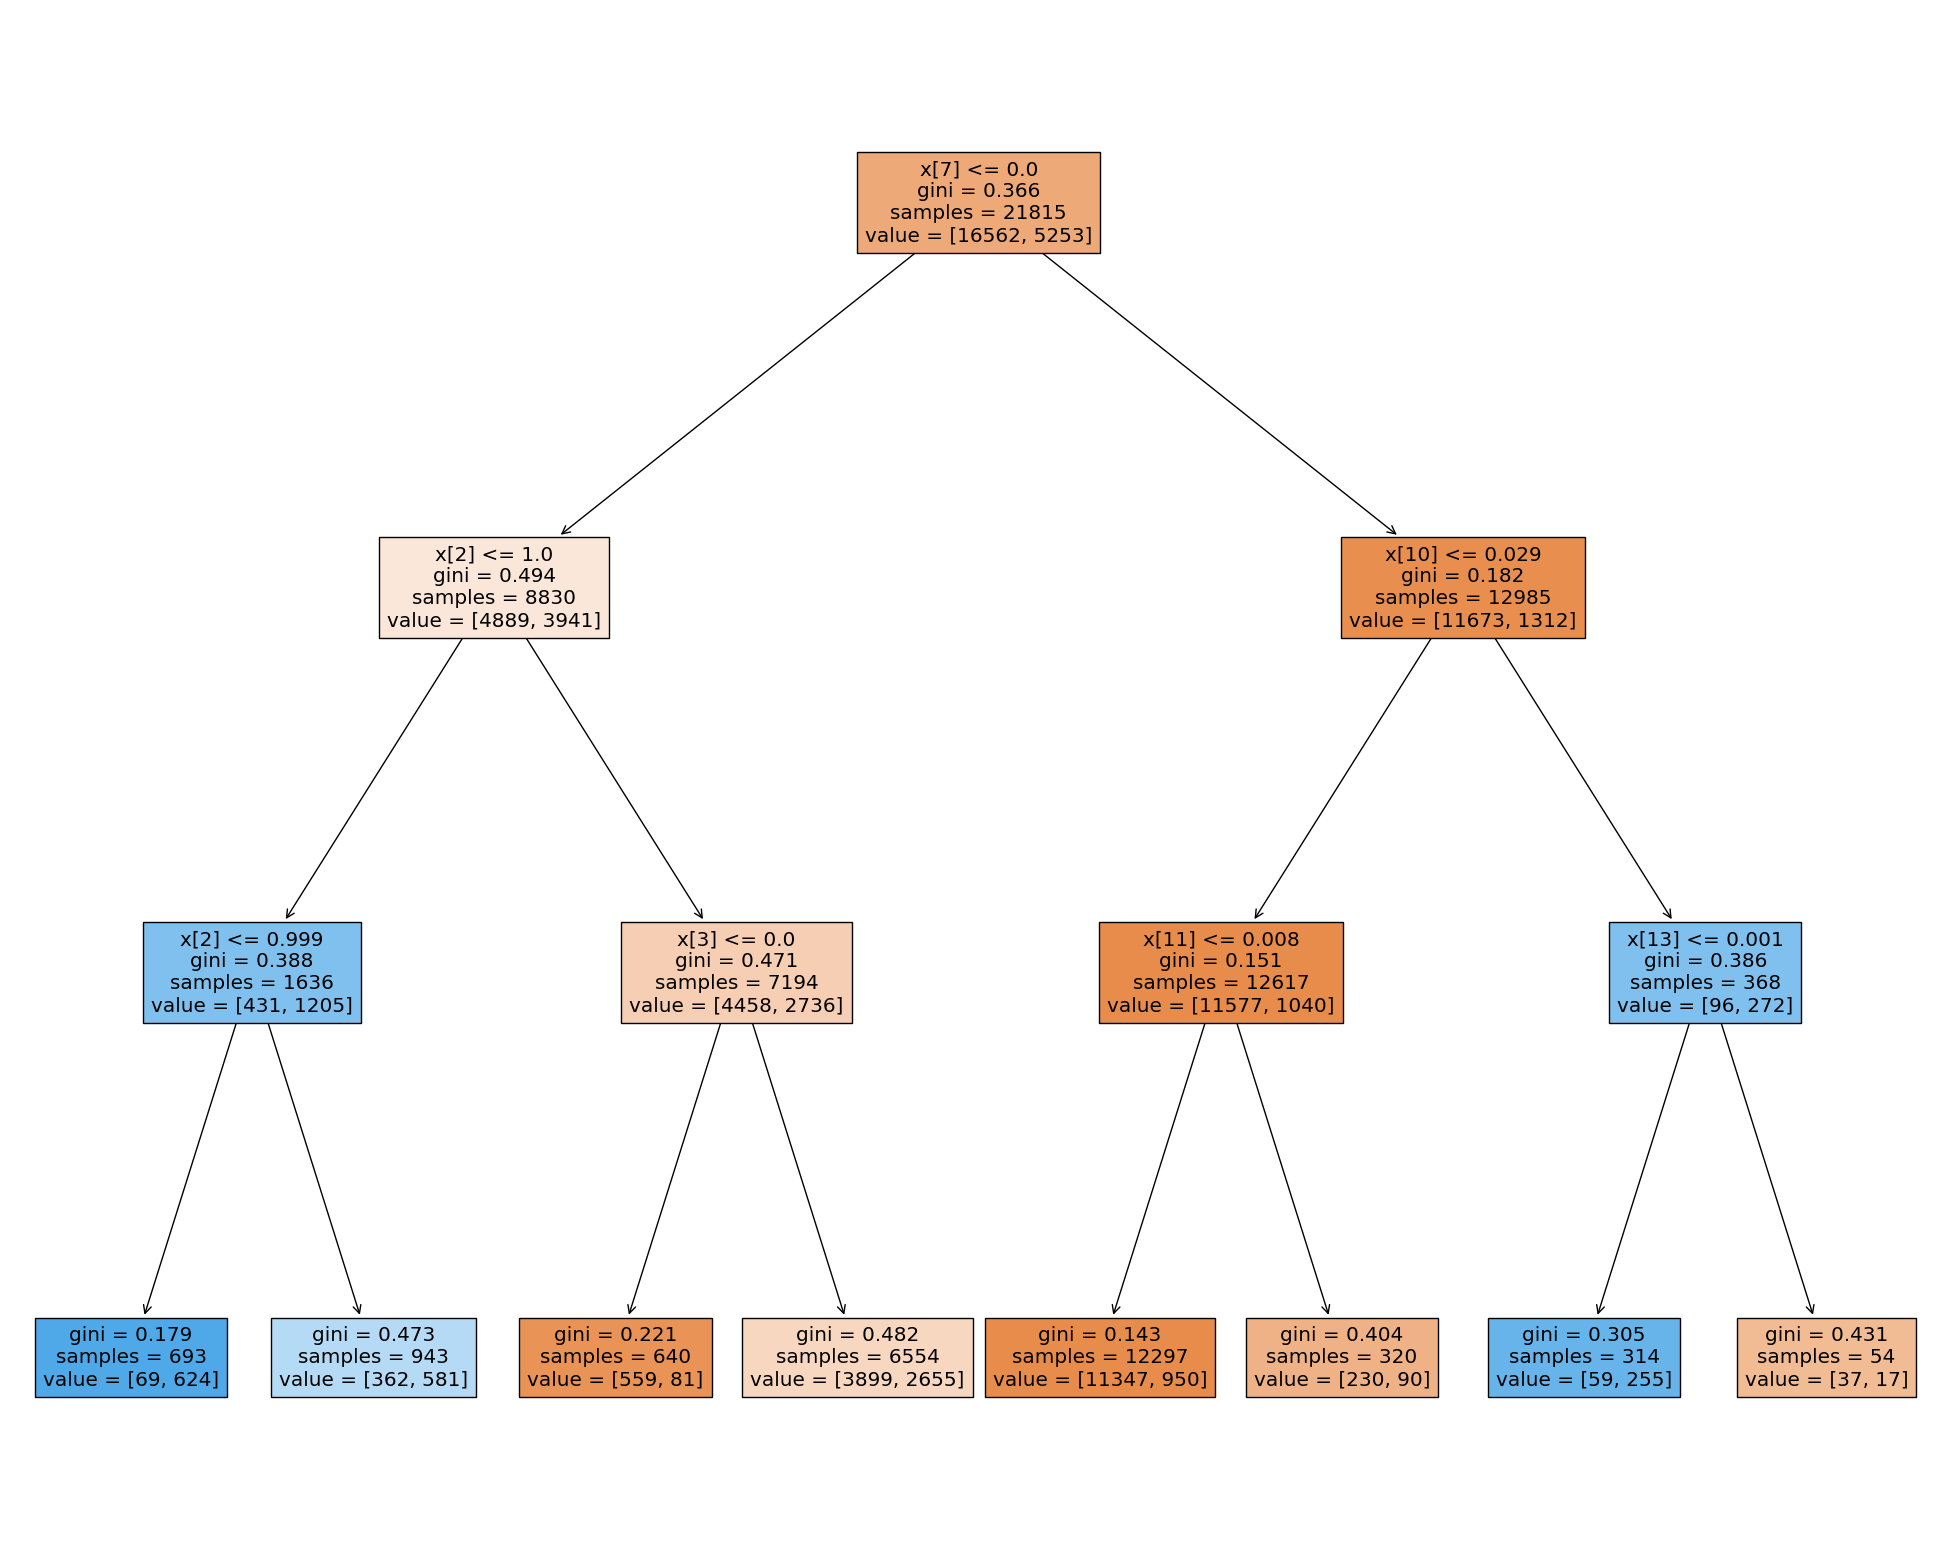

In [19]:
fig= plt.figure(figsize=(25,20))
output= tree.plot_tree(modeldt, filled=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


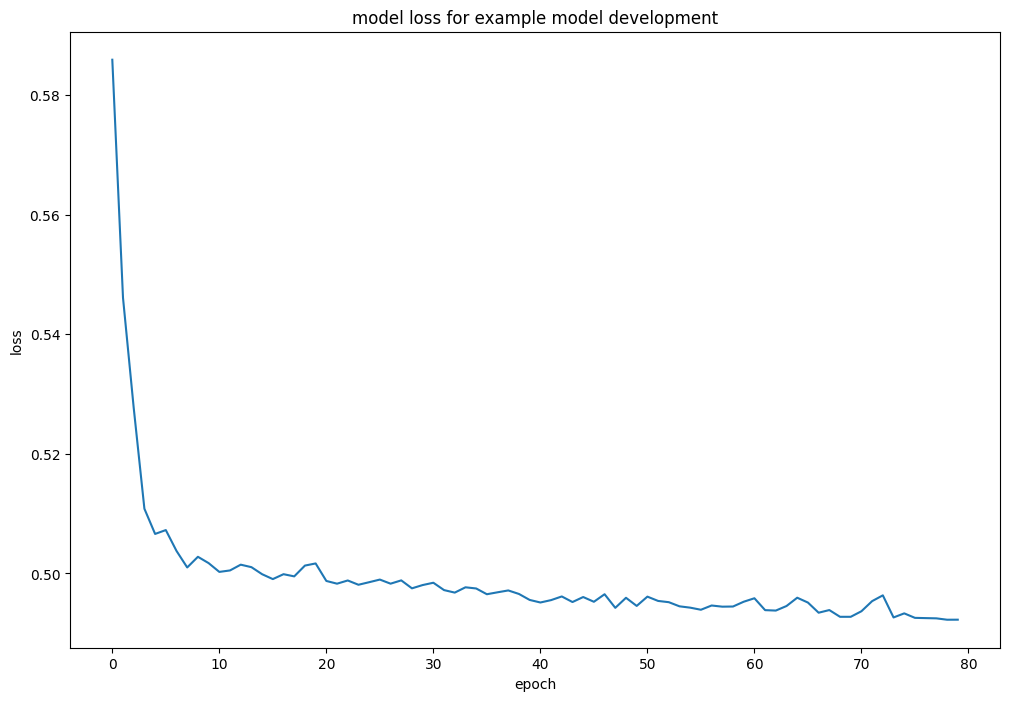

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
336/336 [==============================] - 1s 2ms/step - loss: 0.4860 - acc: 0.7994
Acuracy:  0.7994415760040283


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
336/336 [==============================] - 1s 2ms/step
Predicted      0    All
Actual                 
0           8157   8157
1           2588   2588
All        10745  10745


In [20]:
#@title Deep Learning Algorithm
# Need to rerun seed for each DL cell
tf.random.set_seed(seed)

# simple guide to sequential model
#https://keras.io/guides/sequential_model/

# Building the neural network
modeldl = Sequential()
# First layer has 14 features as input and has 1000 perceptrons, it is using ReLu (do not change this) as an activation function
modeldl.add(Dense(1000, input_dim=14, activation='relu'))

# The following three layers have 100,100 and 50 perceptrons, they are also using ReLu (do not change this) as an activation function
# if you are tunning the network, you can modifiy the layers here, add remove of change the number of perceptrons.
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(50, activation='relu'))

# The output layer has one neuron and sigmoid is the output activation function - do not change these.
modeldl.add(Dense(1, activation='sigmoid'))


# Compile model -  loss function of metrics
modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
# Feel free here to modify the batch size and epochs!
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=0)



#  matplotlib loss over epoch and confusion matrix
plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Acuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = modeldl.predict(X_test)
dl_y_pred = np.argmax(dl_y_pred,axis=1)


# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

# Model Selection

You need to select and rationalise which of the two models you intend to use based on performance metrics and confusion metrics.  Keep trustworthiness in mind when selecting which model you will use going forward.

You can try to tune the models implemented and select relevant features improve the performance provided you have time.

<b>Remember:</b>


*   Deep learning = modeldl
*   Decision tree = modeldt


<br>
Please change the code for the next task to use the model you selected.

# Target Group Bias



1.   Definition to calculate the accuracy per target group (there is no nicer way to do this).
2.   The second code cell creates lists for each target group. The example is for sex (male and female). This is a dichotomous class, thus, if the class has for example five target groups, you would need to create five sets of lists, and modify the if statements to collate the predicted and actual values for each target group. Then using the definition it will display the individual performance metrics for each target group.

### Tasks:



1.   Identify as many target groups as you can within the time limit
2.   Calculate the performance metrics for each target group to identify any group that has algorithmic bias.
3.   Provide discussion on what the measures mean, in terms of not only accuracy, but in terms of sensitivity and specificity.


<i>Hint: create one cell per target group as you will need to record this for the model cards</i>

In [21]:
#@title Definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays -- usually convesion from pandas to numpy
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):
    if item == pred[index]:
      correct += 1   #correct is not updated if the actual is different from predicted
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2)
  return accuracy


In [32]:
#@title Example for target groups (sex - male, Female)

female_pred = []      # Female was label encoded as 0
female_actual_class = []

male_pred = []        # Male was label encoded as 1
male_actual_class = []


# Populate the confusion matrix grouping by gender (col index 9) you could also do this via group by but would need to convert back to pandas dataframe.
# When grouping by multi class, you will have to modify the below code to include multi class, as for this example there is only two.
# Also we are using the DT algorithm here, you can change this to DL if you selected that algorithm.
for index,row in enumerate(X_test):
    if row[9] == 0:       # Female
        female_pred.append(dt_y_pred[index])
        female_actual_class.append(Y_test[index])
    else:     # Male
        male_pred.append(dt_y_pred[index])
        male_actual_class.append(Y_test[index])


# Print the representation of each target group
print("Female instances in the test set:", len(female_pred))
print("Male instances in the test set:  ", len(male_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
ACC=subMetrics("Female", female_actual_class, female_pred)


print("Accuracy:", ACC, "%")
print("\n")
print(pd.crosstab( np.array(female_actual_class),  np.array(female_pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

print("\n")
print("\n")
print("\n")
print("\n")
print("\n")

ACC_M=subMetrics("Male", male_actual_class, male_pred)
print("Accuracy:", ACC_M, "%")
print("\n")
print(pd.crosstab( np.array(male_actual_class),  np.array(male_pred), rownames=['Actual'], colnames=['Predicted'], margins=True))



Female instances in the test set: 3603
Male instances in the test set:   7142



Metrics for:  Female
Accuracy: 91.48 %


Predicted     0   1   All
Actual                   
0          3216  15  3231
1           292  80   372
All        3508  95  3603










Metrics for:  Male
Accuracy: 74.99 %


Predicted     0    1   All
Actual                    
0          4695  231  4926
1          1555  661  2216
All        6250  892  7142


In [28]:
pip install matplotlib seaborn


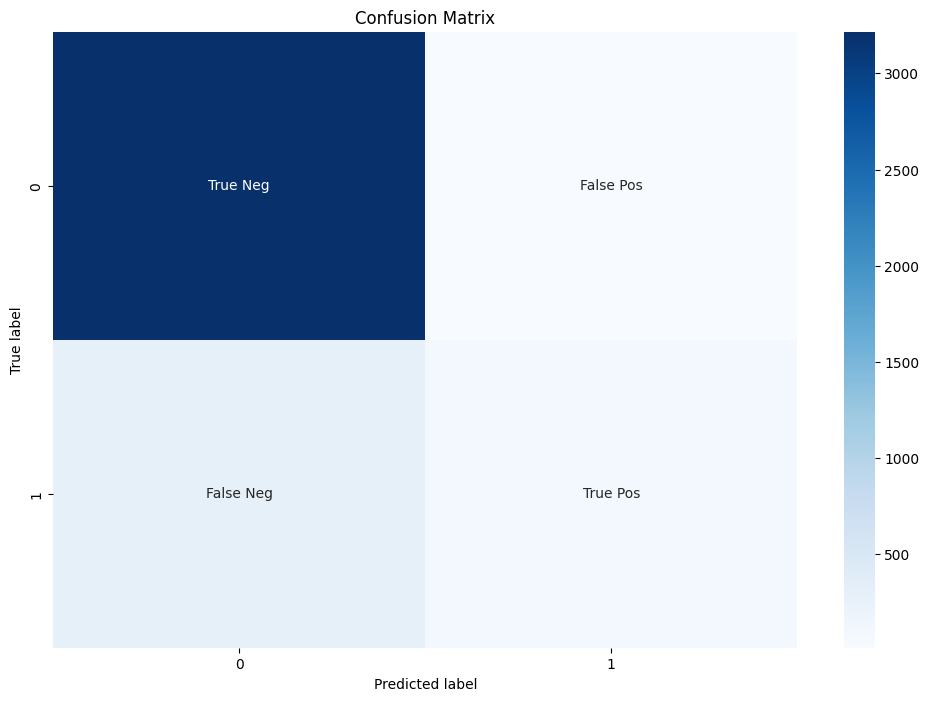

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#import numpy as np

# Example true and predicted values
#y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
#y_pred = [0, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(female_actual_class,female_pred)


# Create labels for the matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Adding titles and labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()


# Discuss the Findings and Develop Model Card

For this task you need to:

*   Disucss the overall findings, specifically around data bias and algorithm bias.
*   Develop a model card (see below for guidance)

<br>

Please ensure to be transparent while presenting data on your model, and ensure to use plain language and easy to understand metrics, as many readers of a model card are stakeholders in the project and not developers.
<br>


Model cards were discussed in: https://dl.acm.org/doi/10.1145/3287560.3287596, if you do not have access to this paper, please ask a tutor.

* The suggested format with prompts can be found in the paper (table 1) and is
presented below:

<img src="https://raw.githubusercontent.com/KeithQuille-TUDublin/HCAIM_IP/main/modelCardsections.png" width=300px>

* The two examples of model cards can be found in Tables 2 and 3 and are presented below:


<img src="https://raw.githubusercontent.com/KeithQuille-TUDublin/HCAIM_IP/main/modelC1.png" width=400px>

<img src="https://raw.githubusercontent.com/KeithQuille-TUDublin/HCAIM_IP/main/modelC2.png" width=400px>





